In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Read in the data
data = pd.read_csv('data\\FinalData.csv')

In [2]:
# Gradient descent function
def gradient_descent(m, b, points, L, column):
    m_gradient = 0
    b_gradient = 0
    n = len(points)

    for i in range(n):
        x = points.iloc[i][column]
        y = points.iloc[i].Final
        m_gradient += -(2/n) * x * (y - (m * x + b))
        b_gradient += -(2/n) * (y - (m * x + b))

    new_m = m - (L * m_gradient)
    new_b = b - (L * b_gradient)
    return new_m, new_b

In [8]:
# Gradient descent for total
L = .0001
epochs = 300
m = 0
b = 0
for i in range(epochs):
    if i % 100 == 0:
        print(f'Epoch {i}')
    m, b = gradient_descent(m, b, data, L, 'Total')
print(f'Total Weights: m={m}, b={b}')

Epoch 0
Epoch 100
Epoch 200
Total Weights: m=0.9426590865188947, b=-0.015616755540369821


In [9]:
# Gradient descent for each category 
    # Homework
hw_m = 0
hw_b = 0
for i in range(epochs):
    hw_m, hw_b = gradient_descent(hw_m, hw_b, data, L, 'Homework')
print(f'Homework Weights: m={hw_m}, b={hw_b}')

    # Project
proj_m = 0
proj_b = 0
for i in range(epochs):
    proj_m, proj_b = gradient_descent(proj_m, proj_b, data, L, 'Project')
print(f'Project Weights: m={proj_m}, b={proj_b}')

    # Quiz
quiz_m = 0
quiz_b = 0
for i in range(epochs):
    quiz_m, quiz_b = gradient_descent(quiz_m, quiz_b, data, L, 'Quiz')
print(f'Quiz Weights: m={quiz_m}, b={quiz_b}')

    # Exam
exam_m = 0
exam_b = 0
for i in range(epochs):
    exam_m, exam_b = gradient_descent(exam_m, exam_b, data, L, 'Exam')
print(f'Exam Weights: m={exam_m}, b={exam_b}')

Homework Weights: m=0.8686517098651529, b=0.0707946875988739
Project Weights: m=0.9308274558667987, b=0.3226994028988868
Quiz Weights: m=0.9330665525906611, b=0.029764346859777347
Exam Weights: m=0.9257178709022299, b=0.042361587769321876


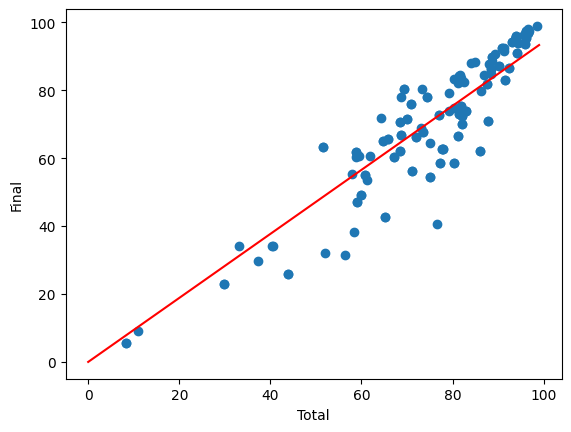

In [4]:
# Predict the final grade with averages
# # hw = input('Enter the homework average: ').replace(',', '.')
# # proj = input('Enter the project average: ').replace(',', '.')
# # quiz = input('Enter the quiz average: ').replace(',', '.')
# # exam = input('Enter the exam grade: ').replace(',', '.')
hw = 100.0
proj = 100.0
quiz = 100.0
exam = 100.0

# Predict Using Total
total = (hw * .15) + (proj * .15) + (quiz * .2) + (exam * .5)
final_total = m * total + b
# Plot the data
plt.scatter(data.Total, data.Final)
plt.plot(list(range(0, 100)), [m * x + b for x in range(0, 100)], color='red')
plt.xlabel('Total')
plt.ylabel('Final')
plt.show()

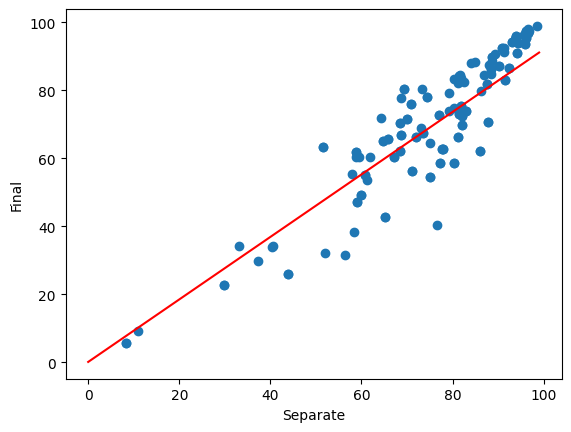

In [6]:
# Predict Using Averages
m = (hw_m * .15) + (proj_m * .15) + (quiz_m * .2) + (exam_m * .5)
b = (hw_b * .15) + (proj_b * .15) + (quiz_b * .2) + (exam_b * .5)
total = (hw * .15) + (proj * .15) + (quiz * .2) + (exam * .5)
final_separate = m * total + b
# Plot the data
plt.scatter(data.Total, data.Final)
plt.plot(list(range(0, 100)), [m * x + b for x in range(0, 100)], color='red')
plt.xlabel('Separate')
plt.ylabel('Final')
plt.show()

In [7]:
# Convert to letter grade
letter_total = 'A' if final_total >= 90 else 'B' if final_total >= 80 else 'C' if final_total >= 70 else 'D' if final_total >= 60 else 'F'
letter_separate = 'A' if final_separate >= 90 else 'B' if final_separate >= 80 else 'C' if final_separate >= 70 else 'D' if final_separate >= 60 else 'F'
print(f'\nPredicted Final Using Total: {final_total:.2f} ({letter_total})')
print(f'Predicted Final Using Separate: {final_separate:.2f} ({letter_separate})')


Predicted Final Using Total: 94.25 (A)
Predicted Final Using Separate: 92.03 (A)
